# Conditional Probability

- For many situations in the real world analysts have information of events that have already occurred. Additional information regarding the occurrence of an event may have a affect the probability of other events happening.
- The probability of an event A may have to be adjusted if we know for certain that some related event B has already occurred.
- "Any probability that is revised to take into account the (known) occurrence of other events is said to be a **conditional probability**".

### Example: 

Experiment: a fair die is being tossed. 

Question: what is the probability of getting a 6 given that the result is an even number.

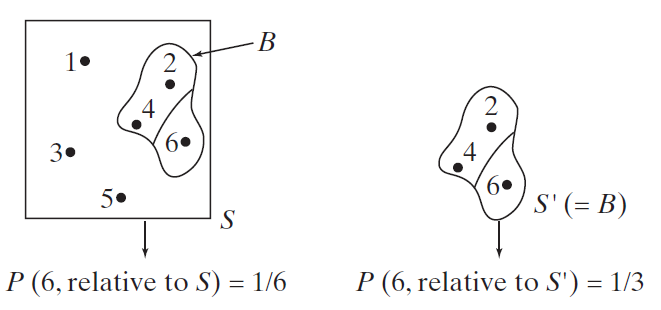

### Formula

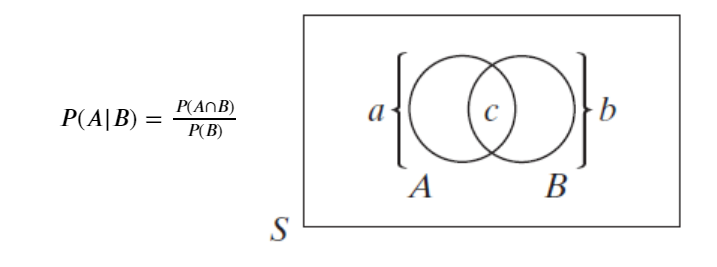

In [2]:
options(warn=-1)
install.packages('purrr')
library('purrr')

package 'purrr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Juan Estrada\AppData\Local\Temp\RtmpmMhcyc\downloaded_packages


In [3]:
n=20
S<-rdunif(n, 1,6)
S
length(S[S==6])/length(S)

length(S[S==6])/length(S[S%%2==0])

[1] 2 2 3 6 6 5 2 1 6 3 3 2 2 5 6 1 4 2 2 3

[1] 0.2

[1] 0.3333333

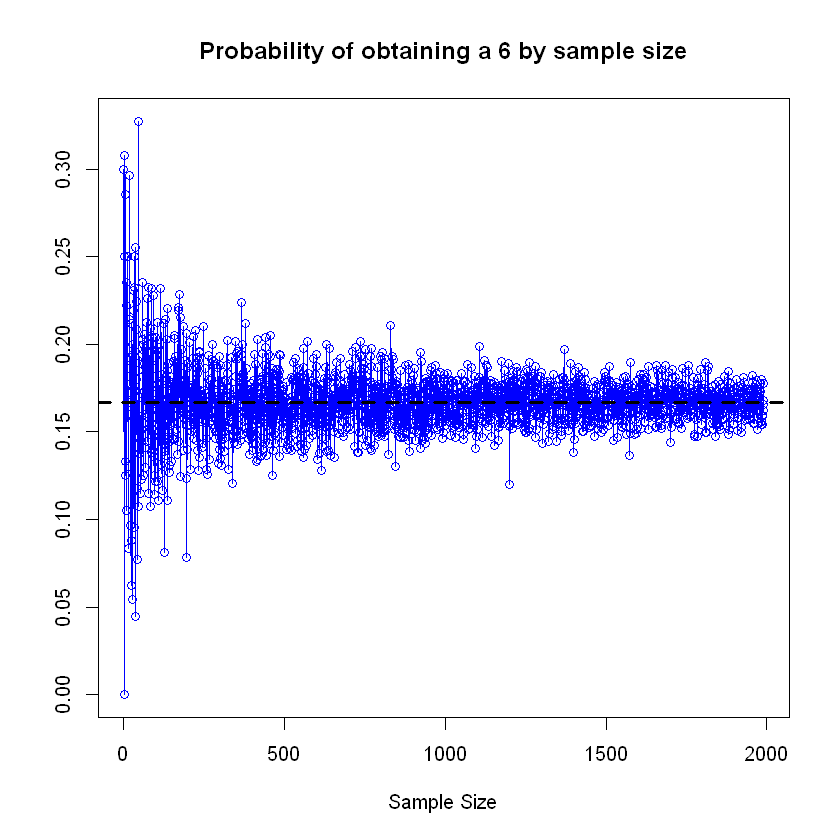

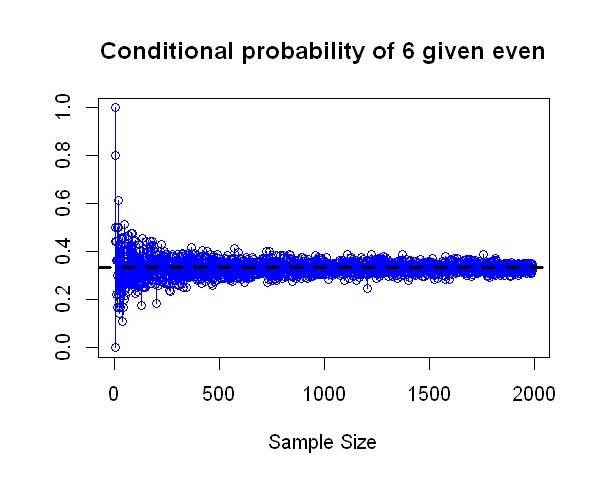

In [4]:
P6<-1/6                 #define theoretical probability of obtaining a 6
P6_even<-(1/6)/(1/2)    #define theoretical probability of obtaining a 6 given even

P6_sim<-vector()        #initialize empty vector
P6_even_sim<-vector()   #initialize empty vector

#repeat the experiment of tossing a die 2000 times
for (n in 10:2000){
    S<-rdunif(n, 1,6)
    P6_sim<-append(P6_sim,length(S[S==6])/length(S))
    P6_even_sim<-append(P6_even_sim,length(S[S==6])/length(S[S%%2==0]))    
}


#Ploting the probability of obtaining a 6
plot(P6_sim,type="o", col="blue",ann=FALSE)
abline(h=P6, col="black",lwd=3, lty=2)
title(main="Probability of obtaining a 6 by sample size")
title(xlab="Sample Size")
options(repr.plot.width=5, repr.plot.height=4)

#Ploting the conditional probability of obtaining a six given even
plot(P6_even_sim,type="o", col="blue",ann=FALSE)
abline(h=P6_even, col="black",lwd=3, lty=2)
title(main="Conditional probability of 6 given even")
title(xlab="Sample Size")
options(repr.plot.width=5, repr.plot.height=4)

### Conditional Probabilities of higher order intersections.

$P(A_1 \cap A_2 \cap A_3 \cap \dots \cap A_n)= P(A_n|A_1 \cap \dots A_{n-1})*P(A_{n-1}|A_1 \cap \dots A_{n-2})*\dots *P(A_2|A_1)*P(A)$

**Example:** An urn contains five white chips, four black chips, and three red chips. Four chips are drawn sequentially and without replacement. What is the probability of obtaining the sequence (white, red, white, black)?

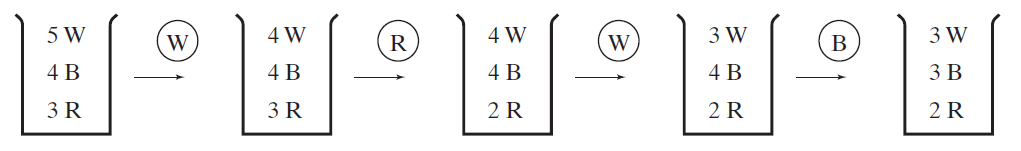

*Solution:* Define the events

- A: white chip is drawn on first selection
- B: red chip is drawn on second selection
- C: white chip is drawn on third selection
- D: black chip is drawn on fourth selection

$P(A \cap B \cap C \cap D)=P(D|A \cap B \cap C)*P(C|A \cap B)*P(B|A)*P(A)=\frac{4}{9}*\frac{4}{10}*\frac{3}{11}*\frac{5}{12}=0.02$

In [5]:
u<-c(replicate(5,'W'),replicate(4,'B'),replicate(3,'R')) #Create the urn
sample(u,4) #take a sample of 4 chips from the urn without replacement

#define a function to calculate the probability of a particular sequence given a number n of repretitions
prob<-function(n){
    event<-vector() #initialize an empty vector
    for (i in 1:n){
        event<-append(event,all(sample(u,4)==c('W','R','W','B'))*1) #repeats the event of taking 4 chips from the urn n times
    }
mean(event)} #calculates the probability of obtaining the sequence 'W','R','W','B'

rep_50<-vector()
rep_1000<-vector()

for (j in 1:100){
    rep_50<-append(rep_50,prob(50))
    rep_1000<-append(rep_1000,prob(1000))
}

[1] "W" "W" "W" "B"

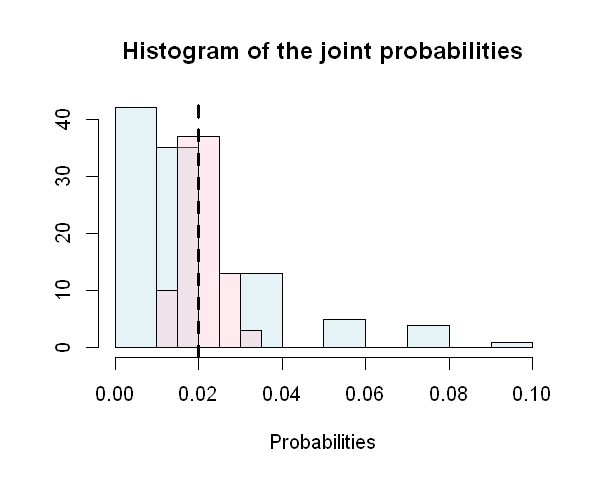

In [6]:
c1 <- rgb(173,216,230,max = 255, alpha = 80, names = "lt.blue")
c2 <- rgb(255,192,203, max = 255, alpha = 80, names = "lt.pink")

h1<-hist(rep_50, breaks=12,plot = FALSE)
h2<-hist(rep_1000, breaks=5,ann=FALSE,plot = FALSE)

plot(h1,ann=FALSE, col=c1) 
plot(h2, add = TRUE, col=c2)
options(repr.plot.width=5, repr.plot.height=4)
title(main="Histogram of the joint probabilities")
title(xlab="Probabilities")
abline(v=0.02,col="black",lwd=3, lty=2)

## The Law of Total Probability and Baye's Rule

This is an important tool for solving probability problems where the sample space can be considered a union of mutually exclusive events. 

*Let $A_{1}, A_{2}, \dots, A_{n}$ be such that $\cup_{i=1}^{n}A_{i}=\Omega$ and $A_{i}\cap A_{j}=\emptyset$ for all $i \neq j$ with $\mathbb{P}(A_{i})>0$ for all $i$. Then, for any event $E$:*

$$\mathbb{P}(E)=\sum_{i=1}^{n} \mathbb{P}\left(E \cap A_{i}\right)=\sum_{i=1}^{n} \mathbb{P}\left(E | A_{i}\right) \mathbb{P}\left(A_{i}\right)$$

Often, it is easier to calculate the conditional probabilities $\mathbb{P}(E|A_{i})$ for an appropriately selected $A_{i}$ than to compute $\mathbb{P}(E)$ directly. That is when the **Baye's Rule** come in handy:

### Baye's Rule:

*Let $A_{1}, A_{2}, \dots, A_{n}$ be such that $\cup_{i=1}^{n}A_{i}=\Omega$ and $A_{i}\cap A_{j}=\emptyset$ for all $i \neq j$ with $\mathbb{P}(A_{i})>0$ for all $i$. Then:

$$\mathbb{P}\left(A_{j} | E\right)=\frac{\mathbb{P}\left(E \cap A_{j}\right)}{\mathbb{P}(E)}=\frac{\mathbb{P}\left(E | A_{j}\right) \mathbb{P}\left(A_{j}\right)}{\sum_{i=1}^{n} \mathbb{P}\left(E | A_{i}\right) \mathbb{P}\left(A_{i}\right)}$$

## Example Baye's rule: Choose a Door

- The television show *Let's Make a Deal*, hosted by Monty Hall, gave contestants the chance to choose, among three doors, the one that concealed the grand prize.
- Behind the other two doors were much less valuable prizes.
- After the contestant chose one of the doors, say Door 1, Monty opened one of the other two doors, say Door 3, containing a much less valuable prize.
- **The contestant was then asked whether he or she wished to stay with the original choice (Door 1) or switch to the other closed door (Door 2).**
- <font color='red'>What should the contestant do?</font>
- What is the probability of winning by switching doors when given the opportunity; and what is the probability of winning by staying with the initial door selection?

### Solution 1: approximate the probability by simulation

In [7]:
n<-1000
true<-sample(1:3,n, replace=TRUE)
guess<-sample(1:3,n, replace=TRUE)

pr_no_switch<-sum(true==guess)/n
pr_switch<-sum(true!=guess)/n

pr_no_switch
pr_switch

ifelse(pr_no_switch>pr_switch,print("Contestant shoudl stay in the originla choise"),
       print("Contestant shoudl switch to the other closed door"))

[1] 0.323

[1] 0.677

[1] "Contestant shoudl switch to the other closed door"


[1] "Contestant shoudl switch to the other closed door"

#### What is going on?

Initially, the probability of the grand price being behind each of the doors is $1/3$. However, after one of the doors is opened, new information is reveled changing the probability of winning. To see that, let's go through the argument using Bay's rule:

As mentioned, when a contestant selects a door $\mathbb{P}(D_{1})=\mathbb{P}(D_{2})=\mathbb{P}(D_{3})=1/3$. Assume (with out lost of generality) that the contestant initially guesses Door 1 and Monty shows that the grand price is not behind door 3 (call that event $O_{3}$). The probability of winning the grand price is now $\mathbb{P}(D_{1}|O_{3})$ and $\mathbb{P}(D_{2}|O_{3})$. Note that:

- $\mathbb{P}(O_{3}|D_{1})=1/2$ both door 1 and 2 are equally likely to be opened.

- $\mathbb{P}(O_{3}|D_{2})=1$ because the only door Monty can open without revealing the grand prize is Door 3.

- $\mathbb{P}(O_{3}|D_{3})=0$ because Monty will not open Door 3 if it contains the grand prize.

Following the Baye's theorem we have that:

$\begin{aligned} \mathbb{P}\left(D_{1} | O_{3}\right) &=\frac{\mathbb{P}\left(O_{3} | D_{1}\right) \mathbb{P}\left(D_{1}\right)}{\mathbb{P}\left(O_{3} | D_{1}\right) \mathbb{P}\left(D_{1}\right)+\mathbb{P}\left(O_{3} | D_{2}\right) \mathbb{P}\left(D_{2}\right)+\mathbb{P}\left(O_{3} | D_{3}\right) \mathbb{P}\left(D_{3}\right)} \\ &=\frac{1 / 2 \times 1 / 3}{1 / 2 \times 1 / 3+1 \times 1 / 3+0 \times 1 / 3}=\frac{1}{3} \end{aligned}.$

However, if the contestant decides to switch his initial guess:

$\begin{aligned} \mathbb{P}\left(D_{2} | O_{3}\right) &=\frac{\mathbb{P}\left(O_{3} | D_{2}\right) \mathbb{P}\left(D_{2}\right)}{\mathbb{P}\left(O_{3} | D_{1}\right) \mathbb{P}\left(D_{1}\right)+\mathbb{P}\left(O_{3} | D_{2}\right) \mathbb{P}\left(D_{2}\right)+\mathbb{P}\left(O_{3} | D_{3}\right) \mathbb{P}\left(D_{3}\right)} \\ &=\frac{1 \times 1 / 3}{1 / 2 \times 1 / 3+1 \times 1 / 3+0 \times 1 / 3}=\frac{2}{3} \end{aligned}$

<font color='red'>Therefore, it is always to the contestant’s benefit to switch doors<font>
